In [1]:
import pandas as pd

df = pd.read_excel('링크랭크_매장 전체_2020-10-18_D1.xlsx', sheet_name='Sheet1', header=0)

In [2]:
date_list = ["%.2d" % i for i in range(5, 18)]
date_list.pop(4)
date_list.reverse()

In [3]:
for num in date_list:
    
    df = pd.concat([df,pd.read_excel(f'링크랭크_매장 전체_2020-10-{num}_D1.xlsx', sheet_name='Sheet1', header=0)])
 

In [4]:
df.columns = ['date', 'hour',
              'm_0-14', 'm_15-24', 'm_25-34', 'm_35-44', 'm_45-54', 'm_55-64', 'm_65-',
              'f_0-14', 'f_15-24', 'f_25-34', 'f_35-44', 'f_45-54', 'f_55-64', 'f_65-',
              'm_total', 'f_total', 'unkn', 'mf_total', 'status']






In [5]:
df['m_total'] = df['m_0-14'] + df['m_15-24'] + df['m_25-34'] + df['m_35-44'] + df['m_45-54'] + df['m_55-64'] + df['m_65-']

In [6]:
df['f_total'] = df['f_0-14'] + df['f_15-24'] + df['f_25-34'] + df['f_35-44'] + df['f_45-54'] + df['f_55-64'] + df['f_65-']



In [7]:
df['mf_total'] = df['m_total'] + df['f_total']

In [8]:
df['date'] = df['date'] + " " + df['hour'].astype('str') + ":00:00"


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['wkday'] = df['date'].dt.weekday_name

In [11]:
def wkend(date):
    
    if date == 'Sunday' or date == 'Saturday':
        return 'wkend'
    else:
        return 'wkday'

df['wkday_wkend'] = df['wkday'].apply(wkend)

In [92]:
from scipy import stats


# 데이터 담기

stats.ttest_ind(df['m_total'], df['f_total'], equal_var=False)


Ttest_indResult(statistic=-6.426270549160149, pvalue=5.601077130049771e-10)

In [93]:
import seaborn as sns

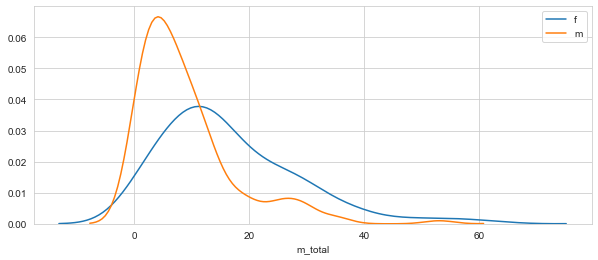

In [104]:
import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')


plt.figure(figsize=[10,4])


#sns.distplot(df['mf_total'], hist=False, label = 'mf')
sns.distplot(df['f_total'], hist=False, label = 'f', hue='wkday_wkend')
sns.distplot(df['m_total'], hist=False, label = 'm', hue='wkday_wkend')



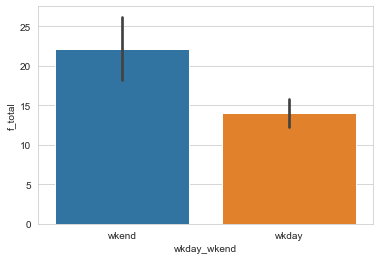

In [112]:
sns.barplot(data= df, y='f_total', x= 'wkday_wkend', aggfunc)
#sns.distplot(df['m_total'], hist=False, label = 'm', hue='wkday_wkend')

In [113]:
df

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,...,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
0,2020-10-18 10:00:00,10,1,0,0,2,0,0,0,0,...,0,0,0,3,3,1,6,stable,Sunday,wkend
1,2020-10-18 11:00:00,11,1,1,2,9,4,1,0,0,...,2,3,0,18,16,3,34,stable,Sunday,wkend
2,2020-10-18 12:00:00,12,0,0,5,12,5,2,1,1,...,6,3,0,25,27,7,52,stable,Sunday,wkend
3,2020-10-18 13:00:00,13,0,0,2,15,5,4,0,1,...,7,4,1,26,30,8,56,stable,Sunday,wkend
4,2020-10-18 14:00:00,14,1,0,6,14,6,2,1,1,...,4,4,1,30,31,6,61,stable,Sunday,wkend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2020-10-05 17:00:00,17,0,0,2,2,3,1,0,0,...,5,2,2,8,21,3,29,stable,Monday,wkday
8,2020-10-05 18:00:00,18,0,0,2,3,0,0,0,0,...,3,1,0,5,15,0,20,stable,Monday,wkday
9,2020-10-05 19:00:00,19,0,0,1,1,2,1,1,0,...,1,0,0,6,11,2,17,stable,Monday,wkday
10,2020-10-05 20:00:00,20,0,0,2,1,0,0,0,0,...,0,0,0,3,2,0,5,stable,Monday,wkday


In [120]:
df.loc[:, df.columns.str.contains('f')]

TypeError: ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [125]:
df.iloc[:, [0,9,10,11,12,13,14,15]]

,date,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-
0,2020-10-18 10:00:00,0,0,2,1,0,0,0
1,2020-10-18 11:00:00,0,0,5,6,2,3,0
2,2020-10-18 12:00:00,1,1,4,12,6,3,0
3,2020-10-18 13:00:00,1,0,8,9,7,4,1
4,2020-10-18 14:00:00,1,0,5,16,4,4,1
...,...,...,...,...,...,...,...,...
7,2020-10-05 17:00:00,0,1,5,6,5,2,2
8,2020-10-05 18:00:00,0,0,6,5,3,1,0
9,2020-10-05 19:00:00,0,0,5,5,1,0,0
10,2020-10-05 20:00:00,0,0,2,0,0,0,0


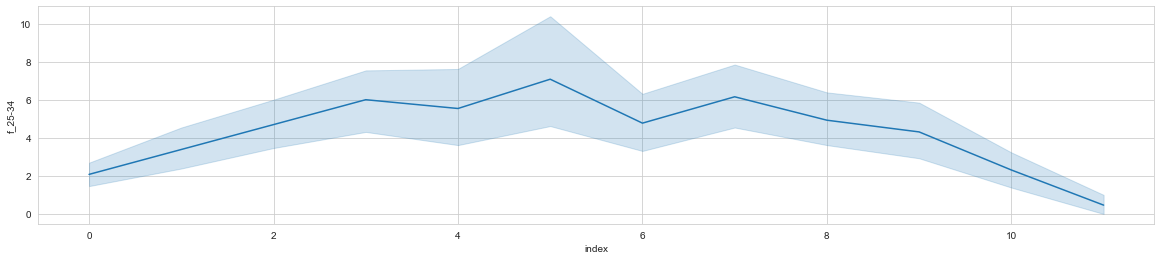

In [133]:

plt.figure(figsize=[20,4])

sns.lineplot(data = df.reset_index(), y = 'f_25-34', x ='index' )

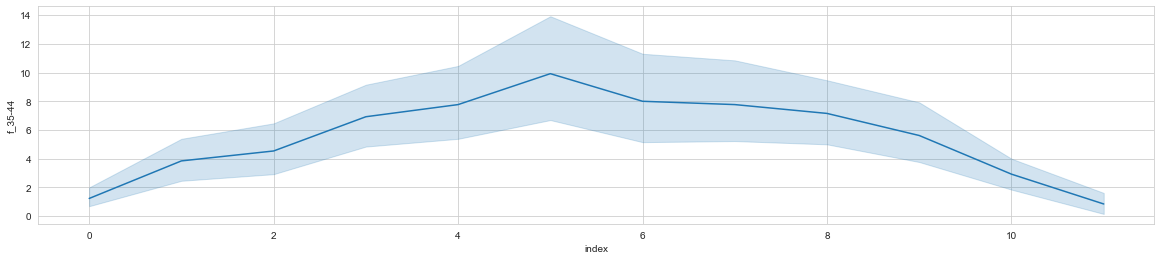

In [136]:

plt.figure(figsize=[20,4])

sns.lineplot(data = df.reset_index(), y = 'f_35-44', x ='index' )

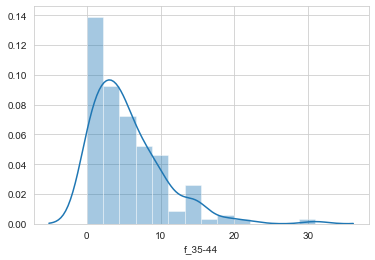

In [127]:
sns.distplot(df['f_35-44'])

In [140]:
df.iloc[:,2:-7].describe()

,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.179487,0.147436,2.217949,3.692308,1.608974,0.935897,0.147436,0.262821,0.224359,4.307692,5.544872,3.358974,2.455128,0.358974
std,0.447029,0.406472,2.719808,4.382686,1.780082,1.184194,0.437065,0.643701,0.502558,3.384243,4.951823,2.996662,2.453024,0.681069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.000000,2.000000,0.000000
75%,0.000000,0.000000,3.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,6.000000,8.000000,5.000000,4.000000,1.000000
max,2.000000,2.000000,20.000000,24.000000,10.000000,5.000000,3.000000,4.000000,2.000000,23.000000,31.000000,15.000000,12.000000,4.000000


In [145]:
df.loc[(df['hour'].isin([10, 11])) 
    & (df['wkday_wkend'] == 'wkday'),
       
       ['m_25-34', 'f_25-34']].describe()

,m_25-34,f_25-34
count,18.000000,18.000000
mean,0.722222,2.611111
std,0.826442,1.460817
min,0.000000,1.000000
25%,0.000000,1.250000
50%,1.000000,2.500000
75%,1.000000,3.000000
max,3.000000,6.000000


In [146]:
df.loc[(df['hour'].isin([10, 11])) 
    & (df['wkday_wkend'] == 'wkday'),
       
       ['m_35-44', 'f_35-44']].describe()

,m_35-44,f_35-44
count,18.000000,18.000000
mean,1.833333,2.388889
std,2.036433,2.173067
min,0.000000,0.000000
25%,0.250000,1.000000
50%,1.000000,2.000000
75%,2.000000,4.000000
max,6.000000,8.000000


In [148]:
df.loc[(df['hour'].isin([10, 11])) 
    & (df['wkday_wkend'] == 'wkday'),
       
       ['m_25-34', 'f_25-34', 'm_35-44', 'f_35-44', 'm_45-54', 'f_45-54']].describe()

,m_25-34,f_25-34,m_35-44,f_35-44,m_45-54,f_45-54
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.722222,2.611111,1.833333,2.388889,0.666667,1.388889
std,0.826442,1.460817,2.036433,2.173067,0.970143,1.243283
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.250000,0.250000,1.000000,0.000000,0.250000
50%,1.000000,2.500000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,2.000000,4.000000,1.000000,2.000000
max,3.000000,6.000000,6.000000,8.000000,3.000000,4.000000


In [150]:
df.loc[(df['hour'].isin([10, 11])) 
    & (df['wkday_wkend'] == 'wkday'),
       
       ['m_25-34', 'f_25-34', 'm_35-44', 'f_35-44', 'm_45-54', 'f_45-54']].describe()

,m_25-34,f_25-34,m_35-44,f_35-44,m_45-54,f_45-54
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.722222,2.611111,1.833333,2.388889,0.666667,1.388889
std,0.826442,1.460817,2.036433,2.173067,0.970143,1.243283
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.250000,0.250000,1.000000,0.000000,0.250000
50%,1.000000,2.500000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,2.000000,4.000000,1.000000,2.000000
max,3.000000,6.000000,6.000000,8.000000,3.000000,4.000000


In [154]:
df.head(1)

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,...,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
0,2020-10-18 10:00:00,10,1,0,0,2,0,0,0,0,...,0,0,0,3,3,1,6,stable,Sunday,wkend


In [165]:


wkday_staff_percentage_df = df.loc[(df['hour'].isin([10, 11])) 
                                 & (df['wkday_wkend'] == 'wkday'), ['f_25-34','mf_total']]

wkday_staff_percentage_df['percentage'] = wkday_staff_percentage_df['f_25-34'] / wkday_staff_percentage_df['mf_total']

print('평일 여성 25-34 연령대의 비율 평균 :', np.mean(wkday_staff_percentage_df['percentage']))
print('평일 여성 25-34 연령대의 비율 표준편차 :', np.std(wkday_staff_percentage_df['percentage']))


평일 여성 25-34 연령대의 비율 평균 : 0.23696543932051173
평일 여성 25-34 연령대의 비율 표준편차 : 0.10637394489269812


In [166]:


wkend_staff_percentage_df = df.loc[(df['hour'].isin([10, 11])) 
                                 & (df['wkday_wkend'] == 'wkend'), ['f_25-34','mf_total']]

wkend_staff_percentage_df['percentage'] = wkend_staff_percentage_df['f_25-34'] / wkend_staff_percentage_df['mf_total']

print('주말 여성 25-34 연령대의 비율 평균 :', np.mean(wkend_staff_percentage_df['percentage']))
print('주말 여성 25-34 연령대의 비율 표준편차 :', np.std(wkend_staff_percentage_df['percentage']))


주말 여성 25-34 연령대의 비율 평균 : 0.21183473389355742
주말 여성 25-34 연령대의 비율 표준편차 : 0.13051538103329685


In [167]:


wkday_male_percentage_df = df.loc[(df['hour'].isin([10, 11])) 
                                 & (df['wkday_wkend'] == 'wkday'), ['m_25-34','mf_total']]

wkday_male_percentage_df['percentage'] = wkday_male_percentage_df['m_25-34'] / wkday_male_percentage_df['mf_total']

print('평일 남성 25-34 연령대의 비율 평균 :', np.mean(wkday_male_percentage_df['percentage']))
print('평일 남성 25-34 연령대의 비율 표준편차 :', np.std(wkday_male_percentage_df['percentage']))


평일 남성 25-34 연령대의 비율 평균 : 0.04814571300078547
평일 남성 25-34 연령대의 비율 표준편차 : 0.053813042759120716


In [169]:


wkend_male_percentage_df = df.loc[(df['hour'].isin([10, 11])) 
                                 & (df['wkday_wkend'] == 'wkend'), ['m_25-34','mf_total']]

wkend_male_percentage_df['percentage'] = wkend_male_percentage_df['m_25-34'] / wkend_male_percentage_df['mf_total']

print('주말 남성 25-34 연령대의 비율 평균 :', np.mean(wkend_male_percentage_df['percentage']))
print('주말 남성 25-34 연령대의 비율 표준편차 :', np.std(wkend_male_percentage_df['percentage']))


주말 남성 25-34 연령대의 비율 평균 : 0.05100373482726424
주말 남성 25-34 연령대의 비율 표준편차 : 0.05902823211001202


In [21]:
import numpy as np

np.mean(df.loc[(df['wkday'] == 'Sunday')
    & ((df['hour'] == 14)| (df['hour'] == 15)), 'mf_total'])

50.5

In [22]:
import numpy as np

np.mean(df.loc[(df['wkday'] == 'Friday')
    & ((df['hour'] == 19)| (df['hour'] == 20)), 'mf_total'])

26.0

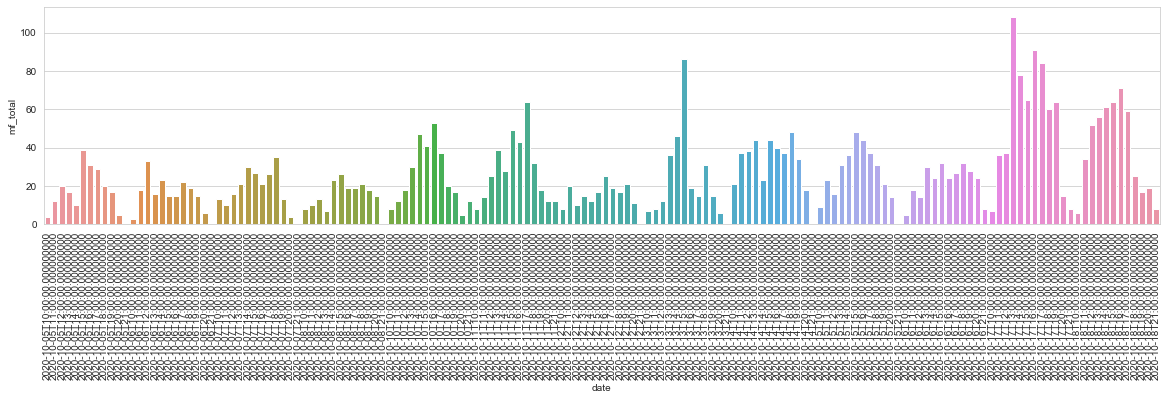

In [32]:
import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=[20,4])
plt.xticks(rotation=90)


sns.barplot(data = df, x = 'date', y = 'mf_total')


In [35]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

df.loc[df['wkday'] == 'Friday']

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
0,2020-10-16 10:00:00,10,0,0,1,0,0,1,0,0,0,1,1,1,0,0,2,3,0,5,stable,Friday,wkday
1,2020-10-16 11:00:00,11,0,0,1,2,3,1,0,0,0,2,1,3,5,0,7,11,1,18,stable,Friday,wkday
2,2020-10-16 12:00:00,12,0,0,2,2,3,0,0,0,0,3,3,1,0,0,7,7,2,14,stable,Friday,wkday
3,2020-10-16 13:00:00,13,1,0,0,6,4,0,0,0,1,2,6,3,6,1,11,19,5,30,stable,Friday,wkday
4,2020-10-16 14:00:00,14,1,0,1,7,3,1,0,0,0,3,2,2,3,1,13,11,4,24,stable,Friday,wkday
5,2020-10-16 15:00:00,15,0,1,0,6,3,2,0,0,0,3,10,7,0,0,12,20,0,32,stable,Friday,wkday
6,2020-10-16 16:00:00,16,0,0,3,7,5,0,0,0,0,1,4,2,2,0,15,9,3,24,stable,Friday,wkday
7,2020-10-16 17:00:00,17,0,0,3,3,4,1,0,0,0,4,8,4,0,0,11,16,6,27,stable,Friday,wkday
8,2020-10-16 18:00:00,18,0,0,6,5,1,1,0,1,0,1,7,6,3,1,13,19,2,32,stable,Friday,wkday
9,2020-10-16 19:00:00,19,0,0,2,3,0,0,0,0,0,5,8,9,1,0,5,23,3,28,stable,Friday,wkday


In [41]:
df.loc[(df['wkday'] == 'Sunday') & ((df['hour'] == 13) | (df['hour'] == 14)) ]

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
3,2020-10-18 13:00:00,13,0,0,2,15,5,4,0,1,0,8,9,7,4,1,26,30,8,56,stable,Sunday,wkend
4,2020-10-18 14:00:00,14,1,0,6,14,6,2,1,1,0,5,16,4,4,1,30,31,6,61,stable,Sunday,wkend
3,2020-10-11 13:00:00,13,0,1,2,2,3,2,0,2,0,12,9,3,3,0,10,29,1,39,stable,Sunday,wkend
4,2020-10-11 14:00:00,14,0,0,5,2,2,3,0,1,0,3,6,4,1,1,12,16,6,28,stable,Sunday,wkend


In [40]:
df

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
0,2020-10-18 10:00:00,10,1,0,0,2,0,0,0,0,0,2,1,0,0,0,3,3,1,6,stable,Sunday,wkend
1,2020-10-18 11:00:00,11,1,1,2,9,4,1,0,0,0,5,6,2,3,0,18,16,3,34,stable,Sunday,wkend
2,2020-10-18 12:00:00,12,0,0,5,12,5,2,1,1,1,4,12,6,3,0,25,27,7,52,stable,Sunday,wkend
3,2020-10-18 13:00:00,13,0,0,2,15,5,4,0,1,0,8,9,7,4,1,26,30,8,56,stable,Sunday,wkend
4,2020-10-18 14:00:00,14,1,0,6,14,6,2,1,1,0,5,16,4,4,1,30,31,6,61,stable,Sunday,wkend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2020-10-05 17:00:00,17,0,0,2,2,3,1,0,0,1,5,6,5,2,2,8,21,3,29,stable,Monday,wkday
8,2020-10-05 18:00:00,18,0,0,2,3,0,0,0,0,0,6,5,3,1,0,5,15,0,20,stable,Monday,wkday
9,2020-10-05 19:00:00,19,0,0,1,1,2,1,1,0,0,5,5,1,0,0,6,11,2,17,stable,Monday,wkday
10,2020-10-05 20:00:00,20,0,0,2,1,0,0,0,0,0,2,0,0,0,0,3,2,0,5,stable,Monday,wkday


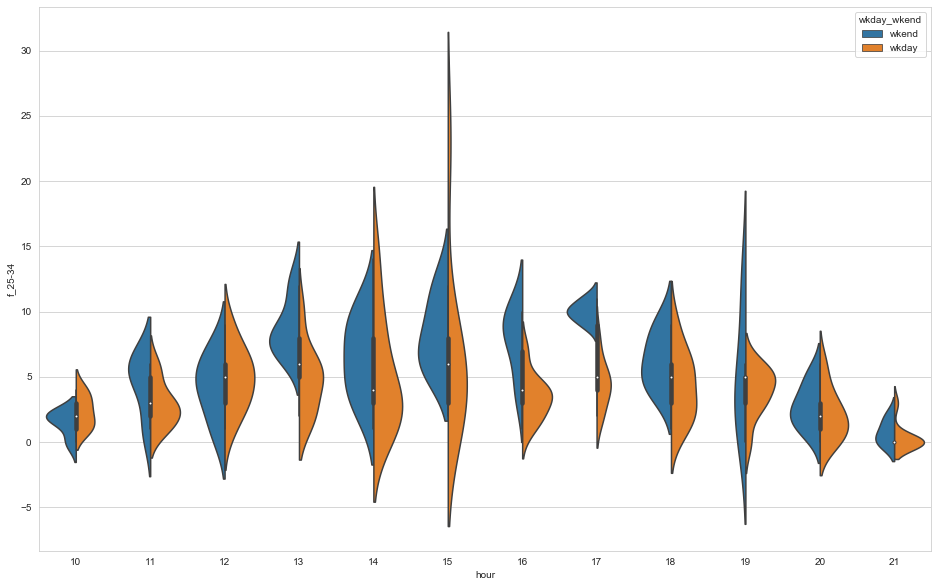

In [52]:
plt.figure(figsize=[16,10])

sns.violinplot(data = df, y = 'f_25-34', x='hour', hue='wkday_wkend', split=True)

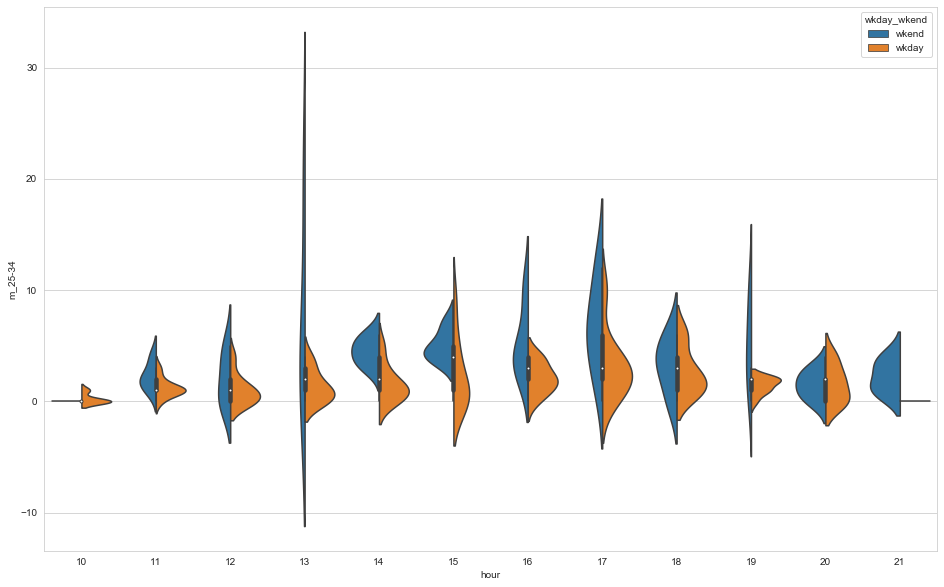

In [53]:
plt.figure(figsize=[16,10])

sns.violinplot(data = df, y = 'm_25-34', x='hour', hue='wkday_wkend', split=True, )

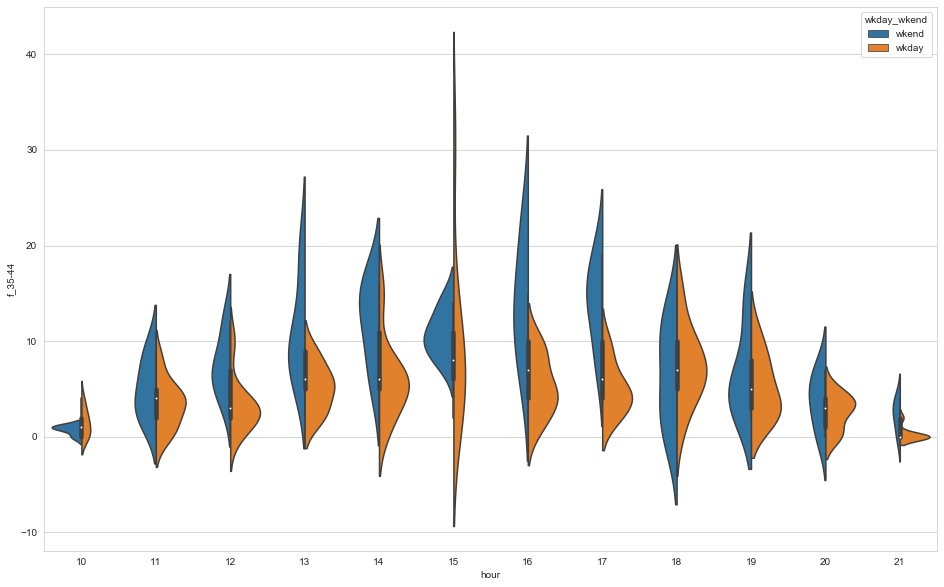

In [54]:
plt.figure(figsize=[16,10])

sns.violinplot(data = df, y = 'f_35-44', x='hour', hue='wkday_wkend', split=True, )

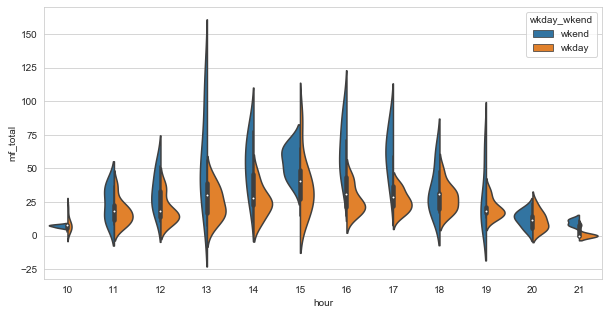

In [60]:
plt.figure(figsize=[10,5])

sns.violinplot(data = df, y = 'mf_total', x='hour', hue='wkday_wkend', split=True, )

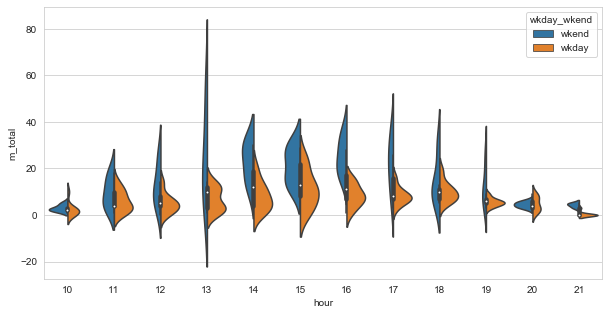

In [61]:
plt.figure(figsize=[10,5])

sns.violinplot(data = df, y = 'm_total', x='hour', hue='wkday_wkend', split=True, )

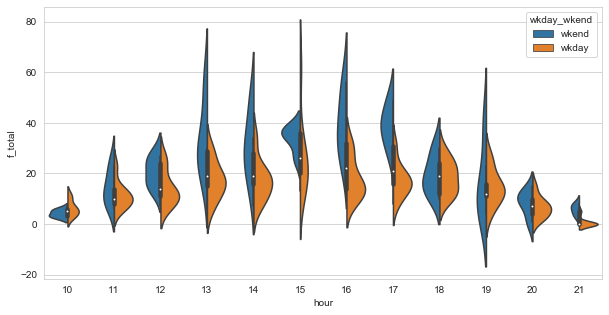

In [62]:
plt.figure(figsize=[10,5])

sns.violinplot(data = df, y = 'f_total', x='hour', hue='wkday_wkend', split=True, )

In [64]:
from scipy import stats


# 데이터 담기

stats.ttest_ind(df['m_total'], df['f_total'], equal_var=False)


Ttest_indResult(statistic=-6.426270549160149, pvalue=5.601077130049771e-10)

In [66]:
df[['m_total', 'f_total']].describe()

,m_total,f_total
count,156.000000,156.000000
mean,8.929487,16.512821
std,8.557292,12.000262
min,0.000000,0.000000
25%,3.000000,8.000000
50%,7.000000,14.000000
75%,12.000000,23.250000
max,53.000000,62.000000


In [68]:
df[['m_25-34', 'f_25-34']].describe()

,m_25-34,f_25-34
count,156.000000,156.000000
mean,2.217949,4.307692
std,2.719808,3.384243
min,0.000000,0.000000
25%,0.000000,2.000000
50%,1.000000,4.000000
75%,3.000000,6.000000
max,20.000000,23.000000


In [71]:
df[['m_35-44', 'f_35-44']].describe()

,m_35-44,f_35-44
count,156.000000,156.000000
mean,3.692308,5.544872
std,4.382686,4.951823
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,5.000000,8.000000
max,24.000000,31.000000


In [88]:
print(np.median(df['m_25-34']))
print(np.mean(df['m_25-34']))
print(np.std(df['m_25-34']))

1.0
2.217948717948718
2.711076216888859


In [89]:
print(np.median(df['m_35-44']))
print(np.mean(df['m_35-44']))
print(np.std(df['m_35-44']))

2.0
3.6923076923076925
4.368616786040423


In [90]:
print(np.median(df['m_45-54']))
print(np.mean(df['m_45-54']))
print(np.std(df['m_45-54']))

1.0
1.608974358974359
1.774367774544651


In [91]:
print(np.median(df['f_25-34']))
print(np.mean(df['f_25-34']))
print(np.std(df['f_25-34']))

4.0
4.3076923076923075
3.373378783674605


In [92]:
print(np.median(df['f_35-44']))
print(np.mean(df['f_35-44']))
print(np.std(df['f_35-44']))

4.0
5.544871794871795
4.935926573340571


In [93]:
print(np.median(df['f_45-54']))
print(np.mean(df['f_45-54']))
print(np.std(df['f_45-54']))

3.0
3.358974358974359
2.9870419248616176


In [87]:
print(np.median(df['f_total']))
print(np.mean(df['f_total']))
print(np.std(df['f_total']))

14.0
16.512820512820515
11.961737706862843


In [109]:
print("중위값 :", np.median(df['m_total']))
print("평균 :", np.mean(df['m_total']))
print("표준편차 :", np.std(df['m_total']))
print("MAE :", mean_absolute_error(df['m_total'], np.full((len(df['m_total'])), np.median(df['m_total']))))


중위값 : 7.0
평균 : 8.929487179487179
표준편차 : 8.529821126785944
MAE : 5.839743589743589


In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_absolute_error(df['f_25-34'], np.full((len(df['f_25-34'])), np.mean(df['f_25-34'])))


2.576923076923077

In [101]:
mean_absolute_error(df['m_25-34'], np.full((len(df['m_25-34'])), np.mean(df['m_25-34'])))


1.8831360946745566

In [102]:
def get_mape(model):
    pred = model.predict(X_test)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    print('{0} MAPE: {1}'.format(model.__class__.__name__,np.round(mape, 3)))
    return mape

In [103]:
#mape

np.mean(np.abs((np.full((len(df['f_25-34'])), np.mean(df['f_25-34'])) - df['f_25-34']) / np.full((len(df['f_25-34'])), np.mean(df['f_25-34'])))) * 100


59.821428571428584

In [104]:
np.mean(np.abs((np.full((len(df['m_25-34'])), np.mean(df['m_25-34'])) - df['m_25-34']) / np.full((len(df['m_25-34'])), np.mean(df['m_25-34'])))) * 100


84.90440195642506

In [69]:
stats.ttest_ind(df['m_25-34'], df['f_25-34'], equal_var=False)


Ttest_indResult(statistic=-6.011659623233234, pvalue=5.390024138301002e-09)

In [70]:
stats.ttest_ind(df['m_35-44'], df['f_35-44'], equal_var=False)


Ttest_indResult(statistic=-3.499075232302028, pvalue=0.0005363120579696554)

In [ ]:
stats.ttest_ind(df['m_35-44'], df['f_35-44'], equal_var=False)


In [94]:
df

,date,hour,m_0-14,m_15-24,m_25-34,m_35-44,m_45-54,m_55-64,m_65-,f_0-14,f_15-24,f_25-34,f_35-44,f_45-54,f_55-64,f_65-,m_total,f_total,unkn,mf_total,status,wkday,wkday_wkend
0,2020-10-18 10:00:00,10,1,0,0,2,0,0,0,0,0,2,1,0,0,0,3,3,1,6,stable,Sunday,wkend
1,2020-10-18 11:00:00,11,1,1,2,9,4,1,0,0,0,5,6,2,3,0,18,16,3,34,stable,Sunday,wkend
2,2020-10-18 12:00:00,12,0,0,5,12,5,2,1,1,1,4,12,6,3,0,25,27,7,52,stable,Sunday,wkend
3,2020-10-18 13:00:00,13,0,0,2,15,5,4,0,1,0,8,9,7,4,1,26,30,8,56,stable,Sunday,wkend
4,2020-10-18 14:00:00,14,1,0,6,14,6,2,1,1,0,5,16,4,4,1,30,31,6,61,stable,Sunday,wkend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2020-10-05 17:00:00,17,0,0,2,2,3,1,0,0,1,5,6,5,2,2,8,21,3,29,stable,Monday,wkday
8,2020-10-05 18:00:00,18,0,0,2,3,0,0,0,0,0,6,5,3,1,0,5,15,0,20,stable,Monday,wkday
9,2020-10-05 19:00:00,19,0,0,1,1,2,1,1,0,0,5,5,1,0,0,6,11,2,17,stable,Monday,wkday
10,2020-10-05 20:00:00,20,0,0,2,1,0,0,0,0,0,2,0,0,0,0,3,2,0,5,stable,Monday,wkday


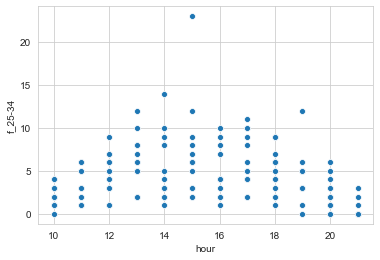

In [121]:
sns.scatterplot(data = df, x = 'hour', y = 'f_25-34', x_jitter=.1)

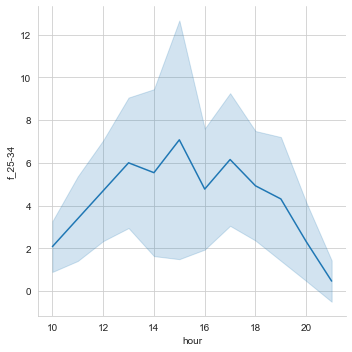

In [122]:
sns.relplot(x="hour", y="f_25-34", kind="line", ci="sd", data=df);


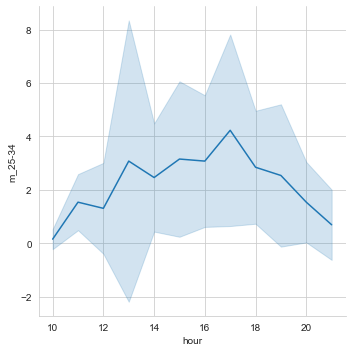

In [123]:
sns.relplot(x="hour", y="m_25-34", kind="line", ci="sd", data=df);
